In [1]:
# 引入Torchvision Datasets
# https://pytorch.org/vision/stable/datasets.html
from torchvision import datasets
from torchvision.transforms import ToTensor # 為了下方引入transform=ToTensor()
import matplotlib.pyplot as plt
import random # 隨機取樣
from torch.utils.data import DataLoader # 資歷分批(Batch)
from torch import nn
import torch
import torchvision

In [2]:
# 引入Fashion-MNIST Dataset
# https://pytorch.org/vision/stable/generated/torchvision.datasets.FashionMNIST.html#torchvision.datasets.FashionMNIST
train_data = datasets.FashionMNIST(
  root="image",
  train=True,
  download=True,
  transform=ToTensor()
)

test_data = datasets.FashionMNIST(
  root="image",
  train=False,
  download=True,
  transform=ToTensor()
)

100%|██████████| 26421880/26421880 [00:01<00:00, 15758712.58it/s]


Extracting image/FashionMNIST/raw/train-images-idx3-ubyte.gz to image/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 276764.01it/s]


Extracting image/FashionMNIST/raw/train-labels-idx1-ubyte.gz to image/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 4936172.91it/s]


Extracting image/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to image/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 24018105.66it/s]


Extracting image/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to image/FashionMNIST/raw



In [3]:
img, label = train_data[0]
class_names = train_data.classes
train_data.classes, label, class_names[label], img.shape, train_data[0]

(['T-shirt/top',
  'Trouser',
  'Pullover',
  'Dress',
  'Coat',
  'Sandal',
  'Shirt',
  'Sneaker',
  'Bag',
  'Ankle boot'],
 9,
 'Ankle boot',
 torch.Size([1, 28, 28]),
 (tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
            0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
            0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
            0.0000, 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
            0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
            0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
            0.0000, 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
            0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
            0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
            0.0000, 0.0000, 0.0000, 0.0000],
         

Text(0.5, 1.0, 'T-shirt/top')

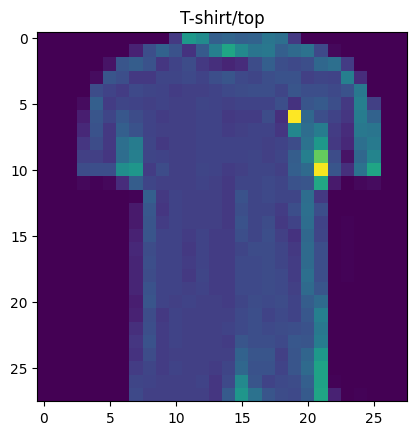

In [4]:
# 畫圖
random_idx = random.randint(0, len(train_data)-1)
img, label = train_data[random_idx]
plt.imshow(img.permute(1, 2, 0)) # 原先是(1, 28, 28) 這樣的shape, 但matplotlib 無法接受, 圖片通道需要在最後一個維度改成(28, 28, 1) 的shape, 所以用permute 換順序
plt.title(class_names[label])

In [5]:
len(train_data), len(test_data),

(60000, 10000)

In [6]:
# 用DataLoader 將資料分批(Batch), 這樣就不需每次更新參數都要完整看完一次資料
BATCH_SIZE = 32
train_dataloader = DataLoader(
    train_data,
    batch_size=BATCH_SIZE,
    shuffle=True # 是否打亂資料
    )

BATCH_SIZE = 32
test_dataloader = DataLoader(
    test_data,
    batch_size=BATCH_SIZE,
    shuffle=False # 測試集沒必要打亂資料
    )
len(train_dataloader), len(test_dataloader)

(1875, 313)

In [7]:
# 由於train_dataloader 為可迭代的物件, 可以用迭代取出第一個值
# next(iter(train_dataloader))
A_iterator = iter(train_dataloader)
next(A_iterator)

[tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           ...,
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],
 
 
         [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           ...,
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],
 
 
         [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000

In [8]:
x_first_batch, y_first_batch = next(iter(train_dataloader))
x_first_batch, y_first_batch, x_first_batch.shape, y_first_batch.shape # x: 圖片, y: 標籤(Label)

(tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           ...,
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],
 
 
         [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           ...,
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],
 
 
         [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000

In [9]:
x_first_batch[0], y_first_batch[0],x_first_batch[0].shape, y_first_batch[0].shape

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0196, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.1373, 0.0549, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.7412, 0.8706, 0.7333, 0.4745, 0.3961, 0.4667, 0.4431,
           0.7451, 0.9216, 0.5412, 0.3333, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.4000, 1.0000, 0.9255, 0.9059, 0.8392, 0.8667, 0.7922, 0.7569,
           0.6392, 0.4471, 0.3922, 0.9098, 0.3255, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.8196, 0.9765, 0.9098, 0.9176, 1.0000, 0.5686, 0.3176, 0.4157,
           0.3686, 0.4392, 0.4275, 0.9176, 

Text(0.5, 1.0, 'Dress')

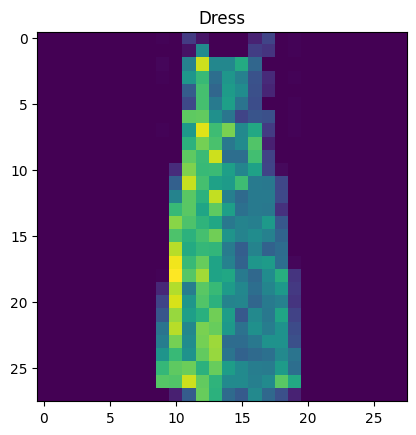

In [10]:
# 畫圖
random_idx = random.randint(0, len(x_first_batch)-1)
img, label = x_first_batch[random_idx], y_first_batch[random_idx]
plt.imshow(img.permute(1, 2, 0)) # 原先是(1, 28, 28) 這樣的shape, 但matplotlib 無法接受, 圖片通道需要在最後一個維度改成(28, 28, 1) 的shape, 所以用permute 換順序
plt.title(class_names[label])

In [11]:
# 攤平圖片特徵
# https://pytorch.org/docs/stable/generated/torch.nn.Flatten.html#torch.nn.Flatten
f = nn.Flatten(start_dim=0, end_dim=-1)
f(x_first_batch[0]), f(x_first_batch[0]).shape

(tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0196, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.1373,
         0.0549, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.7412, 0.8706, 0.7333, 0.4745, 0.3961, 0.4667, 0.4431, 0.7451,
         0.9216, 0.5412, 0.3333, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.4000, 1.0000, 0.9255, 0.9059, 0.8392, 0.8667, 0.7922, 0.7569,
         0.6392, 0.4471, 0.3922, 0.9098, 0.3255, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.8196, 0.9765, 0.9098, 0.9176, 1.0000, 0.5686, 0.3176,
         0.4157, 0.3686, 0.4392, 0.4275, 0.9176, 0.7686, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0

In [12]:
# 定義模型
# https://www.youtube.com/watch?v=ttunNgsQHtU
# 定義名為 ImageClassificationModel 的類別，繼承了 PyTorch 中的 nn.Module 類別
class ImageClassificationModel(nn.Module): # 這表示 ImageClassificationModel 是一個神經網路模型，可以使用 PyTorch 提供的模型相關功能
  def __init__(self, input_shape, output_shape): # 這是 ImageClassificationModel 類別的初始化方法
    # 呼叫父類別（nn.Module）的初始化方法
    super().__init__() # super() 是一個內建函數，用來取得父類別的物件，這樣可以確保父類別的初始化方法被正確呼叫

    # 使用nn.Sequential 將下方架構串在一起
    # self.flatten = nn.Flatten(start_dim=1, end_dim=-1)
    # self.linear_layer = nn.Linear(in_features=784, out_features=10)
    # self.softmax = nn.Softmax(dim=1)
    self.layer_stack = nn.Sequential(
      nn.Flatten(start_dim=1, end_dim=-1), # 攤平, 從x_first_batch 第1 維度開始攤平(第0 維不用)
      nn.Linear(in_features=input_shape, out_features=output_shape), # 現在只有設定一層神經網路; 因為有10 個類別, 所以輸出10 個值
      # nn.Softmax(dim=1) # 對第1 維度做Softmax, 不過因為nn.CrossEntropyLoss() 已經包含softmax 計算, 所以這邊不會用到此行
    )

  # 在PyTorch 中，所有的神經網路模型都需要實作一個名為forward的方法，該方法描述了輸入資料如何透過網路層進行計算，最終得到輸出
  def forward(self ,x):
    return self.layer_stack(x) # 先把x 攤平後再經過線性層計算後輸出10 個值, 並做完softmax 後, 再回傳

In [13]:
x_first_batch, y_first_batch = next(iter(train_dataloader))
x_first_batch.shape, y_first_batch.shape # x: 圖片, y: 標籤(Label)

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

In [14]:
# 創建模型
torch.manual_seed(87)
model = ImageClassificationModel(28*28, 10) # ImageClassificationModel(輸入值個數, 輸出值個數)
y_pred = model(x_first_batch)
y_pred.shape, y_pred.argmax(dim=1), y_pred.argmin(dim=1), y_pred.sum(dim=1), y_pred

(torch.Size([32, 10]),
 tensor([7, 4, 2, 7, 7, 2, 3, 2, 7, 7, 5, 2, 7, 7, 2, 5, 7, 2, 7, 5, 4, 7, 4, 7,
         7, 2, 7, 7, 7, 4, 8, 7]),
 tensor([9, 6, 9, 9, 9, 6, 9, 9, 6, 6, 9, 9, 9, 9, 9, 6, 9, 3, 9, 9, 6, 9, 9, 9,
         9, 9, 9, 9, 6, 9, 9, 3]),
 tensor([-0.9131, -0.6105,  0.2450, -0.3442, -0.1773,  0.1048, -0.3572,  0.6152,
         -0.0712,  0.0787,  0.1667, -0.2455, -0.5357, -0.5263, -0.3453, -0.3651,
         -0.3704, -0.2929,  0.2635, -0.4284, -0.5937, -0.7413,  0.0336,  0.0127,
         -0.7822, -0.3248, -0.8621, -0.2744,  0.2338,  0.5130, -0.3445,  0.0819],
        grad_fn=<SumBackward1>),
 tensor([[-9.9560e-02, -1.2133e-01, -9.0036e-03, -3.1986e-02, -4.8416e-02,
           2.4442e-02, -1.8868e-01,  2.6840e-02, -1.3734e-01, -3.2803e-01],
         [-2.0597e-01, -1.9763e-01,  2.6051e-01,  4.9838e-02,  2.8970e-01,
           6.3283e-03, -3.5875e-01, -9.2310e-02, -1.4256e-02, -3.4802e-01],
         [-8.6530e-02,  9.7942e-02,  4.9494e-01,  3.5980e-01,  4.4822e-01,
          

In [15]:
# 已加到前面定義模型中
# 用Softmax, 讓它便機率的形式且加總=1
# https://pytorch.org/docs/stable/generated/torch.nn.Softmax.html#torch.nn.Softmax
s = nn.Softmax(dim=0) # nn.Softmax(dim=要在第幾個維度做softmax)
s(y_pred), s(y_pred).sum(), s(y_pred).shape, s(y_pred).argmax(), s(y_pred).argmin()

(tensor([[0.0305, 0.0298, 0.0247, 0.0272, 0.0250, 0.0257, 0.0354, 0.0255, 0.0308,
          0.0355],
         [0.0274, 0.0276, 0.0324, 0.0295, 0.0350, 0.0252, 0.0299, 0.0226, 0.0348,
          0.0348],
         [0.0309, 0.0371, 0.0410, 0.0403, 0.0410, 0.0383, 0.0246, 0.0307, 0.0265,
          0.0207],
         [0.0243, 0.0299, 0.0262, 0.0281, 0.0356, 0.0330, 0.0310, 0.0367, 0.0331,
          0.0290],
         [0.0284, 0.0326, 0.0323, 0.0324, 0.0352, 0.0352, 0.0225, 0.0359, 0.0358,
          0.0232],
         [0.0298, 0.0306, 0.0329, 0.0331, 0.0313, 0.0301, 0.0306, 0.0308, 0.0319,
          0.0380],
         [0.0318, 0.0321, 0.0303, 0.0407, 0.0240, 0.0300, 0.0359, 0.0236, 0.0320,
          0.0274],
         [0.0346, 0.0364, 0.0426, 0.0447, 0.0440, 0.0375, 0.0240, 0.0327, 0.0274,
          0.0210],
         [0.0292, 0.0347, 0.0374, 0.0310, 0.0331, 0.0311, 0.0200, 0.0389, 0.0336,
          0.0284],
         [0.0308, 0.0300, 0.0323, 0.0310, 0.0322, 0.0327, 0.0279, 0.0350, 0.0297,
         

In [16]:
# 貼前面寫過的來用
# 設定Cost Function(Cross Entropy)、Optimizer
# https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html#torch.nn.CrossEntropyLoss
cost_fn = nn.CrossEntropyLoss() # 已經包含softmax 計算
y_pred = model(x_first_batch)
cost = cost_fn(y_pred, y_first_batch) # 第一個batch 預測數據與真實數據的cost 差
print(cost)
print(model.state_dict())

# Optimizer
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.01)
optimizer.zero_grad()
cost.backward()
optimizer.step()

y_pred = model(x_first_batch)
cost = cost_fn(y_pred, y_first_batch)
print(cost)
print(model.state_dict())

tensor(2.2975, grad_fn=<NllLossBackward0>)
OrderedDict([('layer_stack.1.weight', tensor([[-0.0355,  0.0281, -0.0032,  ..., -0.0253,  0.0329, -0.0172],
        [-0.0108, -0.0178,  0.0132,  ...,  0.0324, -0.0354,  0.0180],
        [-0.0197,  0.0092,  0.0163,  ..., -0.0204,  0.0296, -0.0310],
        ...,
        [ 0.0022,  0.0250, -0.0206,  ...,  0.0313,  0.0052, -0.0215],
        [ 0.0283,  0.0323,  0.0323,  ...,  0.0146, -0.0040,  0.0086],
        [ 0.0243,  0.0077, -0.0030,  ...,  0.0065,  0.0205,  0.0202]])), ('layer_stack.1.bias', tensor([ 0.0099,  0.0330,  0.0156, -0.0259,  0.0210, -0.0344, -0.0287,  0.0027,
        -0.0189,  0.0245]))])
tensor(2.2304, grad_fn=<NllLossBackward0>)
OrderedDict([('layer_stack.1.weight', tensor([[-0.0355,  0.0281, -0.0032,  ..., -0.0253,  0.0329, -0.0172],
        [-0.0108, -0.0178,  0.0132,  ...,  0.0324, -0.0354,  0.0180],
        [-0.0197,  0.0092,  0.0163,  ..., -0.0204,  0.0296, -0.0310],
        ...,
        [ 0.0022,  0.0250, -0.0206,  ...,  0.0

In [17]:
def accuracy_fn(y_pred, y_true):

  correct_num = (y_pred==y_true).sum()
  acc = correct_num / len(y_true) * 100

  return acc

In [18]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

ImageClassificationModel(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
  )
)

In [19]:
# 新增訓練與測試步驟的程式碼
def train_step(dataloader, model, cost_fn, optimizer, accuracy_fn, device):
  train_cost = 0
  train_acc = 0
  for batch, (x, y) in enumerate(dataloader): # enumerate() 將迭代對象轉換為索引序列
    x = x.to(device)
    y = y.to(device)

    model.train()
    y_pred = model(x)
    cost = cost_fn(y_pred, y)
    train_cost += cost
    train_acc += accuracy_fn(y_pred.argmax(dim=1), y)

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

  train_cost /= len(train_dataloader)
  train_acc /= len(train_dataloader)

  print(f"\nTrain Cost: {train_cost:.4f}, Train Acc: {train_acc:.2f}")

def test_step(dataloader, model, cost_fn, accuracy_fn, device):
  test_cost = 0
  test_acc = 0
  model.eval()
  with torch.inference_mode():
    for x, y in dataloader:
      x = x.to(device)
      y = y.to(device)
      test_pred = model(x)
      test_cost += cost_fn(test_pred, y)
      test_acc += accuracy_fn(test_pred.argmax(dim=1), y)

    test_cost /= len(test_dataloader)
    test_acc /= len(test_dataloader)

  print(f"Test Cost: {test_cost:.4f}, Test Acc: {test_acc:.2f}\n")


In [20]:
"""
# 進度條
from tqdm.auto import tqdm
# 訓練模型
epochs = 3
for epoch in tqdm(range(epochs)): # 加入tqdm 進度條
  print(f"Epoch: {epoch}\n-------")
  train_cost = 0
  train_acc = 0
  for batch, (x, y) in enumerate(train_dataloader): # enumerate() 將迭代對象轉換為索引序列
    x = x.to(device)
    y = y.to(device)

    model.train()
    y_pred = model(x)
    cost = cost_fn(y_pred, y)
    train_cost += cost
    train_acc += accuracy_fn(y_pred.argmax(dim=1), y)

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if batch%500==0:
      print(f"看到第{batch*len(x)}/{len(train_data)}幾筆資料")

  train_cost /= len(train_dataloader)
  train_acc /= len(train_dataloader)

  test_cost = 0
  test_acc = 0
  model.eval()
  with torch.inference_mode():
    for x, y in test_dataloader:
      x = x.to(device)
      y = y.to(device)
      test_pred = model(x)
      test_cost += cost_fn(test_pred, y)
      test_acc += accuracy_fn(test_pred.argmax(dim=1), y)

    test_cost /= len(test_dataloader)
    test_acc /= len(test_dataloader)

  print(f"\nTrain Cost: {train_cost:.4f}, Train Acc: {train_acc:.2f}")
  print(f"Test Cost: {test_cost:.4f}, Test Acc: {test_acc:.2f}\n")

"""

'\n# 進度條\nfrom tqdm.auto import tqdm\n# 訓練模型\nepochs = 3\nfor epoch in tqdm(range(epochs)): # 加入tqdm 進度條\n  print(f"Epoch: {epoch}\n-------")\n  train_cost = 0\n  train_acc = 0\n  for batch, (x, y) in enumerate(train_dataloader): # enumerate() 將迭代對象轉換為索引序列\n    x = x.to(device)\n    y = y.to(device)\n\n    model.train()\n    y_pred = model(x)\n    cost = cost_fn(y_pred, y)\n    train_cost += cost\n    train_acc += accuracy_fn(y_pred.argmax(dim=1), y)\n\n    optimizer.zero_grad()\n    cost.backward()\n    optimizer.step()\n\n    if batch%500==0:\n      print(f"看到第{batch*len(x)}/{len(train_data)}幾筆資料")\n\n  train_cost /= len(train_dataloader)\n  train_acc /= len(train_dataloader)\n  \n  test_cost = 0\n  test_acc = 0\n  model.eval()\n  with torch.inference_mode():\n    for x, y in test_dataloader:\n      x = x.to(device)\n      y = y.to(device)\n      test_pred = model(x)\n      test_cost += cost_fn(test_pred, y)\n      test_acc += accuracy_fn(test_pred.argmax(dim=1), y)\n\n    test_cost 

In [21]:
# 進度條
from tqdm.auto import tqdm
# 訓練模型
epochs = 10
for epoch in tqdm(range(epochs)): # 加入tqdm 進度條
  print(f"Epoch: {epoch}\n-------")
  train_step(train_dataloader, model, cost_fn, optimizer, accuracy_fn, device)

  test_step(test_dataloader, model, cost_fn, accuracy_fn, device)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 0
-------

Train Cost: 0.8188, Train Acc: 74.43
Test Cost: 0.6519, Test Acc: 78.03

Epoch: 1
-------

Train Cost: 0.5891, Train Acc: 80.89
Test Cost: 0.5801, Test Acc: 80.85

Epoch: 2
-------

Train Cost: 0.5400, Train Acc: 82.37
Test Cost: 0.5481, Test Acc: 81.50

Epoch: 3
-------

Train Cost: 0.5138, Train Acc: 83.00
Test Cost: 0.5290, Test Acc: 82.08

Epoch: 4
-------

Train Cost: 0.4966, Train Acc: 83.39
Test Cost: 0.5172, Test Acc: 82.48

Epoch: 5
-------

Train Cost: 0.4839, Train Acc: 83.73
Test Cost: 0.5091, Test Acc: 82.54

Epoch: 6
-------

Train Cost: 0.4740, Train Acc: 84.01
Test Cost: 0.5000, Test Acc: 82.89

Epoch: 7
-------

Train Cost: 0.4667, Train Acc: 84.32
Test Cost: 0.4935, Test Acc: 82.98

Epoch: 8
-------

Train Cost: 0.4602, Train Acc: 84.42
Test Cost: 0.4900, Test Acc: 83.04

Epoch: 9
-------

Train Cost: 0.4549, Train Acc: 84.64
Test Cost: 0.4838, Test Acc: 83.31



In [22]:
# 多層神經網路(這裡三層),一至三層分別有5個, 8個, 10個神經元
# 貼前面寫過的來用
# 定義模型
# https://www.youtube.com/watch?v=FtISpNDnOQc
# 定義名為 ImageClassificationModel2 的類別，繼承了 PyTorch 中的 nn.Module 類別
class ImageClassificationModel2(nn.Module): # 這表示 ImageClassificationModel2 是一個神經網路模型，可以使用 PyTorch 提供的模型相關功能
  def __init__(self, input_shape, output_shape): # 這是 ImageClassificationModel2 類別的初始化方法
    # 呼叫父類別（nn.Module）的初始化方法
    super().__init__() # super() 是一個內建函數，用來取得父類別的物件，這樣可以確保父類別的初始化方法被正確呼叫
    self.layer_stack = nn.Sequential(
      nn.Flatten(start_dim=1, end_dim=-1), # 攤平, 從x_first_batch 第1 維度開始攤平(第0 維不用)

      # 大部分前幾層神經網路都採用ReLU, 而最後一層這個Case 適用Softmax
      # https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html#torch.nn.ReLU
      nn.Linear(in_features=input_shape, out_features=5), # 第一層神經網路; 輸出3 個值
      nn.ReLU(),
      nn.Linear(in_features=5, out_features=8), # 第二層神經網路; 輸出8 個值
      nn.ReLU(),
      nn.Linear(in_features=8, out_features=output_shape), # 第三層神經網路; 因為是最後一層且需要有10 個類別, 所以輸出10 個值
      # Softmax 在等等cost function 上就有了

    )

  # 在PyTorch 中，所有的神經網路模型都需要實作一個名為forward的方法，該方法描述了輸入資料如何透過網路層進行計算，最終得到輸出
  def forward(self ,x):
    return self.layer_stack(x) # 先把x 攤平後再經過線性層計算後輸出10 個值, 並做完softmax 後, 再回傳

In [23]:
model_2 = ImageClassificationModel2(28*28, 10)
model_2.to(device)
cost_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_2.parameters(), lr=0.01)

In [24]:
# 貼前面寫過的來用
# 進度條
from tqdm.auto import tqdm
# 訓練模型
epochs = 10
for epoch in tqdm(range(epochs)): # 加入tqdm 進度條
  print(f"Epoch: {epoch}\n-------")
  train_step(train_dataloader, model_2, cost_fn, optimizer, accuracy_fn, device)

  test_step(test_dataloader, model_2, cost_fn, accuracy_fn, device)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 0
-------

Train Cost: 1.5730, Train Acc: 41.95
Test Cost: 0.8514, Test Acc: 64.86

Epoch: 1
-------

Train Cost: 0.7210, Train Acc: 73.08
Test Cost: 0.6569, Test Acc: 76.76

Epoch: 2
-------

Train Cost: 0.6000, Train Acc: 78.93
Test Cost: 0.5971, Test Acc: 78.39

Epoch: 3
-------

Train Cost: 0.5554, Train Acc: 80.64
Test Cost: 0.5753, Test Acc: 80.03

Epoch: 4
-------

Train Cost: 0.5306, Train Acc: 81.69
Test Cost: 0.5627, Test Acc: 80.42

Epoch: 5
-------

Train Cost: 0.5168, Train Acc: 82.14
Test Cost: 0.5629, Test Acc: 80.46

Epoch: 6
-------

Train Cost: 0.5062, Train Acc: 82.39
Test Cost: 0.5232, Test Acc: 81.77

Epoch: 7
-------

Train Cost: 0.4970, Train Acc: 82.82
Test Cost: 0.5378, Test Acc: 80.71

Epoch: 8
-------

Train Cost: 0.4902, Train Acc: 83.01
Test Cost: 0.5231, Test Acc: 81.92

Epoch: 9
-------

Train Cost: 0.4854, Train Acc: 83.07
Test Cost: 0.5137, Test Acc: 82.24



In [25]:
# 若為單純的數字.item(), 會直接顯示數字
a = torch.tensor(3)
a, a.item()

(tensor(3), 3)

In [26]:
# 評估模型
def eval_model(dataloader, model, cost_fn, accuracy_fn, device):
  test_cost = 0
  test_acc = 0
  model.eval()
  with torch.inference_mode():
    for x, y in dataloader:
      x = x.to(device)
      y = y.to(device)
      test_pred = model(x)
      test_cost += cost_fn(test_pred, y)
      test_acc += accuracy_fn(test_pred.argmax(dim=1), y)

    test_cost /= len(test_dataloader)
    test_acc /= len(test_dataloader)

  return {
      "model_name": model.__class__.__name__,
      "model_cost": test_cost.item(),
      "model_acc" : test_acc.item()
  }


In [27]:
model_1_result = eval_model(test_dataloader, model, cost_fn, accuracy_fn, device)
model_2_result = eval_model(test_dataloader, model_2, cost_fn, accuracy_fn, device)
model_1_result, model_2_result

({'model_name': 'ImageClassificationModel',
  'model_cost': 0.4837782382965088,
  'model_acc': 83.30670928955078},
 {'model_name': 'ImageClassificationModel2',
  'model_cost': 0.5136952996253967,
  'model_acc': 82.23841857910156})

# 其他種類的神經網路

前面是用nn.Linear 全連接層(Fully Connected Layer),

這邊採用卷積層 (Convolutional Layer), 將特徵拆成不同塊,
通常會在卷積層後做池化, 當神經網路有多個卷積層就可稱作CNN

In [34]:
# 簡化版VGG, 含Conv2d & MaxPool2d
# https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html#torch.nn.Conv2d
# https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html#torch.nn.MaxPool2d

# x_first_batch[0].shape
conv_layer = nn.Conv2d(in_channels=1, out_channels=8, kernel_size=(5, 5), stride=1, padding=1)
conv_output = conv_layer(x_first_batch[0])
print(conv_output.shape)

maxpool = nn.MaxPool2d(kernel_size=(2, 2), stride=1, padding=0)
maxpool(conv_output).shape

torch.Size([8, 26, 26])


torch.Size([8, 25, 25])

In [55]:
# 貼前面寫過的來用
# 定義模型
# 定義名為 ImageClassificationModel3 的類別，繼承了 PyTorch 中的 nn.Module 類別
class ImageClassificationModel3(nn.Module): # 這表示 ImageClassificationModel3 是一個神經網路模型，可以使用 PyTorch 提供的模型相關功能
  def __init__(self, input_shape, output_shape): # 這是 ImageClassificationModel3 類別的初始化方法
    # 呼叫父類別（nn.Module）的初始化方法
    super().__init__() # super() 是一個內建函數，用來取得父類別的物件，這樣可以確保父類別的初始化方法被正確呼叫
    self.conv_block_1 = nn.Sequential(

      # 卷積神經網路
      # VCC: 卷積層 -> ReLU -> 卷積層 -> ReLU -> MaxPooling -> 卷積層 -> ReLU -> 卷積層 -> ReLU -> MaxPooling -> 全連接層 -> Softmax
      nn.Conv2d(in_channels=input_shape, out_channels=8, kernel_size=(3, 3), stride=1, padding=1),
      nn.ReLU(),
      nn.Conv2d(in_channels=8, out_channels=8, kernel_size=(3, 3), stride=1, padding=1),
      nn.ReLU(),
      nn.MaxPool2d(kernel_size=(2, 2), stride=2, padding=0),
    )

    self.conv_block_2 = nn.Sequential(
      nn.Conv2d(in_channels=8, out_channels=16, kernel_size=(3, 3), stride=1, padding=1),
      nn.ReLU(),
      nn.Conv2d(in_channels=16, out_channels=16, kernel_size=(3, 3), stride=1, padding=1),
      nn.ReLU(),
      nn.MaxPool2d(kernel_size=(2, 2), stride=2, padding=0),
    )

    self.classifier = nn.Sequential(
      nn.Flatten(start_dim=1, end_dim=-1),
      nn.Linear(in_features=16*7*7, out_features=output_shape),
      # nn.Softmax()
    )

  # 在PyTorch 中，所有的神經網路模型都需要實作一個名為forward的方法，該方法描述了輸入資料如何透過網路層進行計算，最終得到輸出
  def forward(self ,x):
    x = self.conv_block_1(x)
    x = self.conv_block_2(x)
    x = self.classifier(x)
    return x
    # return self.classifier(self.Convblock2(self.Convblock1(x)))

In [56]:
# 貼前面寫過的來用
model_3 = ImageClassificationModel3(1, 10)
model_3.to(device)
cost_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_3.parameters(), lr=0.01)

In [57]:
# 貼前面寫過的來用
# 進度條
from tqdm.auto import tqdm
# 訓練模型
epochs = 10
for epoch in tqdm(range(epochs)): # 加入tqdm 進度條
  print(f"Epoch: {epoch}\n-------")
  train_step(train_dataloader, model_3, cost_fn, optimizer, accuracy_fn, device)

  test_step(test_dataloader, model_3, cost_fn, accuracy_fn, device)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 0
-------

Train Cost: 1.3354, Train Acc: 52.04
Test Cost: 0.6186, Test Acc: 77.48

Epoch: 1
-------

Train Cost: 0.5229, Train Acc: 80.97
Test Cost: 0.4970, Test Acc: 81.62

Epoch: 2
-------

Train Cost: 0.4340, Train Acc: 84.40
Test Cost: 0.4390, Test Acc: 84.22

Epoch: 3
-------

Train Cost: 0.3882, Train Acc: 86.22
Test Cost: 0.3791, Test Acc: 86.90

Epoch: 4
-------

Train Cost: 0.3556, Train Acc: 87.22
Test Cost: 0.3554, Test Acc: 87.36

Epoch: 5
-------

Train Cost: 0.3325, Train Acc: 88.06
Test Cost: 0.3473, Test Acc: 87.81

Epoch: 6
-------

Train Cost: 0.3151, Train Acc: 88.62
Test Cost: 0.3327, Test Acc: 87.86

Epoch: 7
-------

Train Cost: 0.3028, Train Acc: 89.06
Test Cost: 0.3162, Test Acc: 88.78

Epoch: 8
-------

Train Cost: 0.2912, Train Acc: 89.45
Test Cost: 0.3161, Test Acc: 88.54

Epoch: 9
-------

Train Cost: 0.2834, Train Acc: 89.76
Test Cost: 0.3124, Test Acc: 88.62



In [58]:
model_1_result = eval_model(test_dataloader, model, cost_fn, accuracy_fn, device)
model_2_result = eval_model(test_dataloader, model_2, cost_fn, accuracy_fn, device)
model_3_result = eval_model(test_dataloader, model_3, cost_fn, accuracy_fn, device)

model_1_result, model_2_result, model_3_result

({'model_name': 'ImageClassificationModel',
  'model_cost': 0.4837782382965088,
  'model_acc': 83.30670928955078},
 {'model_name': 'ImageClassificationModel2',
  'model_cost': 0.5136952996253967,
  'model_acc': 82.23841857910156},
 {'model_name': 'ImageClassificationModel3',
  'model_cost': 0.3124384582042694,
  'model_acc': 88.61820983886719})